Sally Wu

Course: CIS 9440 Data Warehousing and Analytics - Fall 2023

Final Project: Analyzing Relationship Between 311 Rodent Complaints and the NYC Weather from 2016-2022

In [1]:
# Importing libraries for analysis
import pandas as pd
import numpy as np

The purpose of this project is to see if there's a relationship between the number of rodent complaints (and location they're made in) with the NYC weather and percipitation. The 311 Rodent Complaints data was pulled from NYC Open data while the NYC Weather report data was pulled from Kaggle.

### Part 1: Extract & Initial Data Cleaning

In [2]:
# Reading information from both datasets and holding data in the respective dataframes
df_311 = pd.read_csv("Cleaned_311_Service_Requests.csv")
df_weather = pd.read_csv("NYC_Weather_2016_2022.csv")

In [3]:
# Renaming columns in df_311
df_311 = df_311.rename(columns={"YEAR" : "Year",
                               "MONTH" : "Month",
                               "DAY" : "Day"})

# Creating new columns in df_311 dataset to deicpher whether the location type is an indoor or outdoor location
resident_values= ['1-2 Family Dwelling', '1-2 Family Mixed Use Building', '3+ Family Apt. Building', '3+ Family Mixed Use Building', 'Single Room Occupancy (SRO)',
'3+ Family Apartment Building', '1-3 Family Mixed Use Building', '1-3 Family Dwelling', 'Residential Building', 'Residence', 'Apartment', 'Residence',
'Residential Property', 'Private House', '3+ Family Apt.', '1-2 FamilyDwelling', '3+ Family', '3+Family Apt.', '3+ Family Apt', 'Private Residence',
'Commercial Building', 'Hospital', 'Office Building', 'Government Building', 'Day Care/Nursery', 'School/Pre-School', 'Summer Camp', 'Restaurant/Bar/Deli/Bakery',
'Catering Service', 'Building (Non-Residential)', 'Store', 'Commercial Property', 'Restaurant', 'School', 'Retail Store', 'Cafeteria - College/University', 'Cafeteria - Public School']

df_311["Location"] = np.where(df_311["Location Type"].isin(resident_values), "Inside", "Outside")

df_311.head()

,Unique Key,Full Date,Year,Month,Day,Complaint Type,Descriptor,Location Type,Borough,Incident Zip,Incident Address,Street Name,Status,Created Date,Closed Date,Location
0,32310161,1/1/2016,2016,1,1,Rodent,Rat Sighting,Vacant Lot,BRONX,10473,808 HARDING PARK,HARDING PARK,Closed,1/1/2016,1/8/2016,Outside
1,32312138,1/1/2016,2016,1,1,Rodent,Rat Sighting,Other (Explain Below),BRONX,10468,2327 GRAND CONCOURSE,GRAND CONCOURSE,Assigned,1/1/2016,2/10/2016,Outside
2,32313302,1/1/2016,2016,1,1,Rodent,Rat Sighting,Public Garden,BROOKLYN,11217,143 SOUTH PORTLAND AVENUE,SOUTH PORTLAND AVENUE,Closed,1/1/2016,1/16/2016,Outside
3,32313351,1/1/2016,2016,1,1,Rodent,Rat Sighting,1-2 Family Dwelling,BROOKLYN,11213,1526 PRESIDENT STREET,PRESIDENT STREET,Closed,1/1/2016,1/13/2016,Inside
4,32311356,1/1/2016,2016,1,1,Rodent,Rat Sighting,1-2 Family Dwelling,BRONX,10461,1343 EDWARDS AVENUE,EDWARDS AVENUE,Assigned,1/1/2016,1/20/2016,Inside


In [4]:
# Finding total unique number of incidents
len(df_311["Incident Address"].unique())

113656

In [5]:
# Finding all types of unique location types
df_311["Location Type"].unique()

array(['Vacant Lot', 'Other (Explain Below)', 'Public Garden',
       '1-2 Family Dwelling', '1-2 Family Mixed Use Building',
       'Vacant Building', '3+ Family Apt. Building',
       '3+ Family Mixed Use Building', 'Commercial Building',
       'Construction Site', 'Catch Basin/Sewer', 'Parking Lot/Garage',
       'Hospital', 'Office Building', 'Government Building',
       'Day Care/Nursery', 'School/Pre-School',
       'Single Room Occupancy (SRO)', 'Public Stairs', 'Summer Camp',
       '3+ Family Apartment Building', 'Street Area',
       '1-3 Family Mixed Use Building', 'Other',
       'Restaurant/Bar/Deli/Bakery', '1-3 Family Dwelling',
       'Residential Building', 'Catering Service', 'Public/Unfenced Area',
       'Abandoned Building', 'Grocery Store',
       'Building (Non-Residential)', 'Private Residence', 'Ground',
       'Apartment', 'Store', 'Commercial Property', 'Restaurant',
       'Residence', 'Beach', 'Residential Property', 'School',
       'Retail Store', 'Priv

In [6]:
# Renaming columns in df_weather
df_weather = df_weather.rename(columns={"full_time" : "Full Time",
                               "year" : "Year",
                               "month" : "Month",
                                "day" : "Day",
                                "temperature_2m (°C)" : "Temperature",
                                "precipitation (mm)" : "Precipitation"})

df_weather.head()

,Full Time,Year,Month,Day,Temperature,Precipitation,rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,2016-01-01T00:00,2016,1,1,7.6,0.0,0.0,69.0,53.0,0.0,72.0,10.0,296.0
1,2016-01-01T01:00,2016,1,1,7.5,0.0,0.0,20.0,4.0,0.0,56.0,9.8,287.0
2,2016-01-01T02:00,2016,1,1,7.1,0.0,0.0,32.0,3.0,0.0,99.0,9.7,285.0
3,2016-01-01T03:00,2016,1,1,6.6,0.0,0.0,35.0,5.0,0.0,100.0,9.2,281.0
4,2016-01-01T04:00,2016,1,1,6.3,0.0,0.0,34.0,4.0,0.0,100.0,9.1,279.0


In [7]:
# Displaying information regarding complaint type
df_dim_complaint_type = df_311[["Unique Key", "Descriptor", "Status"]]
df_dim_complaint_type.head()

,Unique Key,Descriptor,Status
0,32310161,Rat Sighting,Closed
1,32312138,Rat Sighting,Assigned
2,32313302,Rat Sighting,Closed
3,32313351,Rat Sighting,Closed
4,32311356,Rat Sighting,Assigned


In [8]:
# Displaying information regarding date
df_dim_date = df_311[["Created Date", "Closed Date", "Year", "Month", "Day"]]
df_dim_date.head()

,Created Date,Closed Date,Year,Month,Day
0,1/1/2016,1/8/2016,2016,1,1
1,1/1/2016,2/10/2016,2016,1,1
2,1/1/2016,1/16/2016,2016,1,1
3,1/1/2016,1/13/2016,2016,1,1
4,1/1/2016,1/20/2016,2016,1,1


In [9]:
# Displaying information regarding location of complaints
df_dim_location = df_311[["Borough", "Incident Address", "Street Name", "Incident Zip", "Location Type"]]
df_dim_location.head()

,Borough,Incident Address,Street Name,Incident Zip,Location Type
0,BRONX,808 HARDING PARK,HARDING PARK,10473,Vacant Lot
1,BRONX,2327 GRAND CONCOURSE,GRAND CONCOURSE,10468,Other (Explain Below)
2,BROOKLYN,143 SOUTH PORTLAND AVENUE,SOUTH PORTLAND AVENUE,11217,Public Garden
3,BROOKLYN,1526 PRESIDENT STREET,PRESIDENT STREET,11213,1-2 Family Dwelling
4,BRONX,1343 EDWARDS AVENUE,EDWARDS AVENUE,10461,1-2 Family Dwelling


### Part 2: Transform

In [10]:
# Creating new dataframe df_weather_avg that only reports the average temperature and average precipitation for each day for purposes of this analysis
df_weather_avg = df_weather.groupby(['Year', 'Month', 'Day']).agg({'Temperature': 'mean', 'Precipitation': 'mean'}).reset_index()
df_weather_avg.head()

,Year,Month,Day,Temperature,Precipitation
0,2016,1,1,5.408333,0.0
1,2016,1,2,2.387500,0.0
2,2016,1,3,3.012500,0.0
3,2016,1,4,0.100000,0.0
4,2016,1,5,-6.775000,0.0


In [11]:
# Merging the 2 datasets on the Year, Month & Day Columns
df = pd.merge(df_311, df_weather_avg[["Year", "Month", "Day", "Temperature", "Precipitation"]], on=["Year", "Month", "Day"])

# Calculating Total Complaints each day for the descriptor type by borough
df = df.groupby(["Year", "Month", "Day", "Temperature", "Precipitation", "Borough", "Location"]).size().reset_index(name='Total Complaints')
df["Full Date"] = pd.to_datetime(df[["Year", "Month", "Day"]])
df.head()

,Year,Month,Day,Temperature,Precipitation,Borough,Location,Total Complaints,Full Date
0,2016,1,1,5.408333,0.0,BRONX,Inside,7,2016-01-01
1,2016,1,1,5.408333,0.0,BRONX,Outside,3,2016-01-01
2,2016,1,1,5.408333,0.0,BROOKLYN,Inside,10,2016-01-01
3,2016,1,1,5.408333,0.0,BROOKLYN,Outside,5,2016-01-01
4,2016,1,1,5.408333,0.0,MANHATTAN,Inside,10,2016-01-01


### Part 2.5: Load

The above merged dataframe is downloaded as a CSV and uploaded to BigQuery as the finalized dataset used for querying and creating visualizations on Looker. Some of the visualizations created through BigQuery/Looker are replicated below in Part 3: Analyze using Python's visualizations libraries. 

### Part 3: Analyze

In [12]:
# Importing data visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

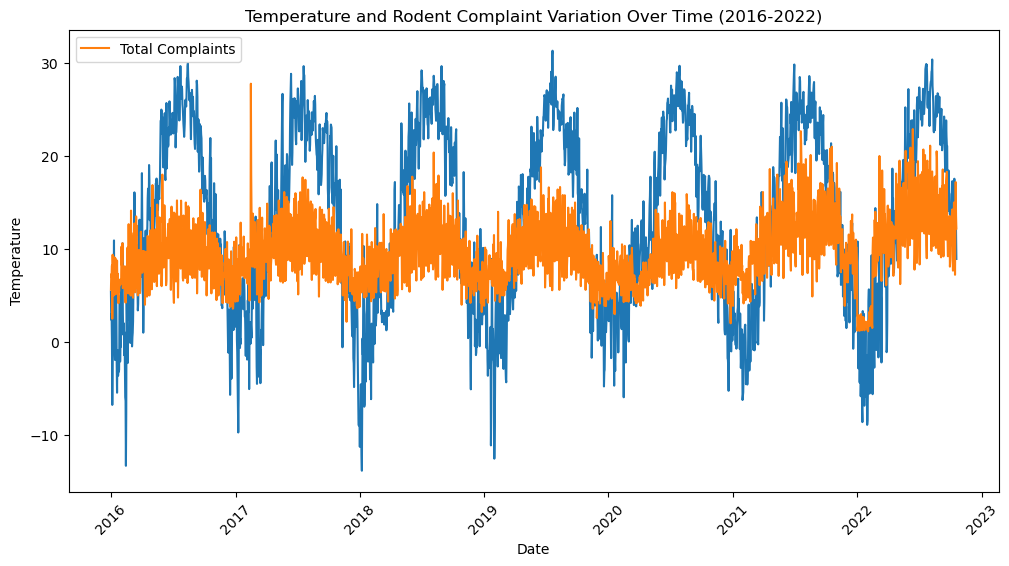

In [13]:
# Plotting line graph showing temperature trends and total rodent complaints over time during the 2016-2022 time period
plt.figure(figsize=(12, 6))
sns.lineplot(x='Full Date', y='Temperature', data=df, ci=None)
sns.lineplot(x='Full Date', y='Total Complaints', data=df, ci=None, label='Total Complaints')
plt.title('Temperature and Rodent Complaint Variation Over Time (2016-2022)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.show()

The above line graph shows seasonality trends from 2016-2022 for both average temperatures (blue line) and total rodent complaints (red line). It's evident that as temperate rises in the warmer months such as spring and summer, so do rodent complaints. However, there are 2 points worth noting; the first is a spike in complaints in 2017 and the second being the drop in 2022. I'm unable to find further news or research explaining why this is.

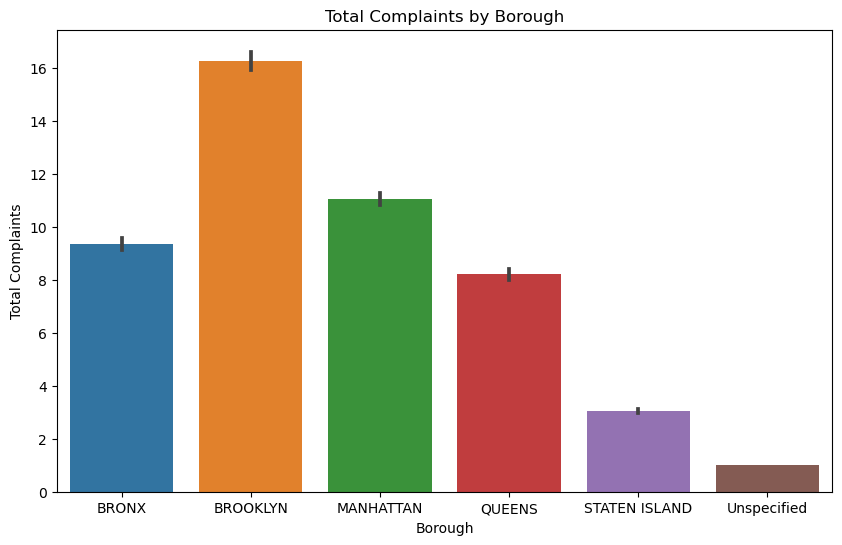

In [14]:
# Plotting bar graph showing total complaints by borough
plt.figure(figsize=(10, 6))
sns.barplot(x='Borough', y='Total Complaints', data=df)
plt.title('Total Complaints by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Complaints')
plt.show()

It appears that the borough with the most rodent complaints is Brooklyn then followed by Manhattan, Bronx, Queens, and finally Staten Island. This is supported by research done by MMPC in which their article "There Are Now 3 Million Rats in NYC, a 50% Increase Since 2010" shows that Brooklyn has the most number of rats at ~1.16M; as of 2022, Brooklyn has seen a 56% increase in rate population from 2010. The article further shows that Queens has the second greatest rat population at ~752K and is followed by Manhattan at ~512K.

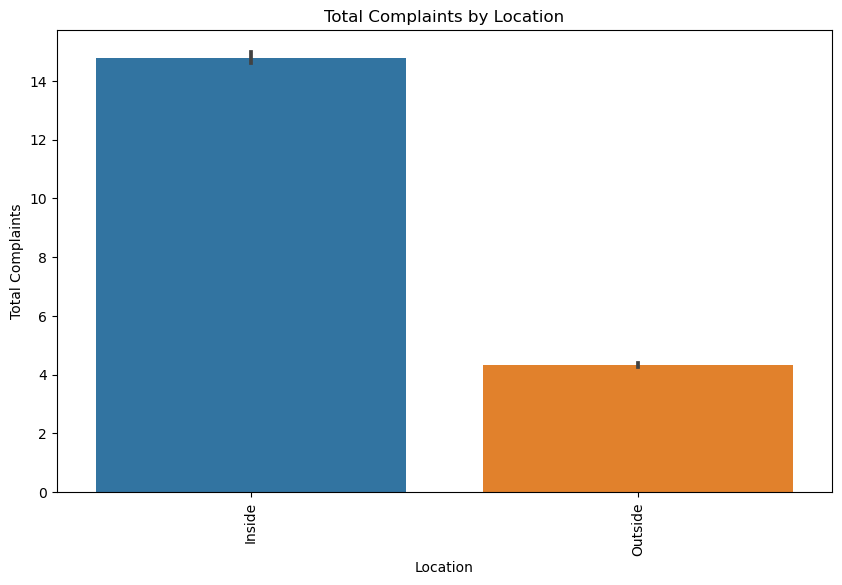

In [15]:
# Plotting bar graph showing total complaints by location type
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Total Complaints', data=df)
plt.title('Total Complaints by Location')
plt.xlabel('Location')
plt.ylabel('Total Complaints')
plt.xticks(rotation=90)
plt.show()

For the purposes of this analysis, I only considered 2 locations: indoors and outdoors. I grouped all property types that were public into outdoors and the others into indoors. Looking at the bargraph, it appears that majority of the 311 complaints made were for locations indoors. However, this doesn't necessarily mean there are more rodents indoors than outdoors since the liklihood of someone making a rodent complaint is much higher indoors than if they were outdoors.

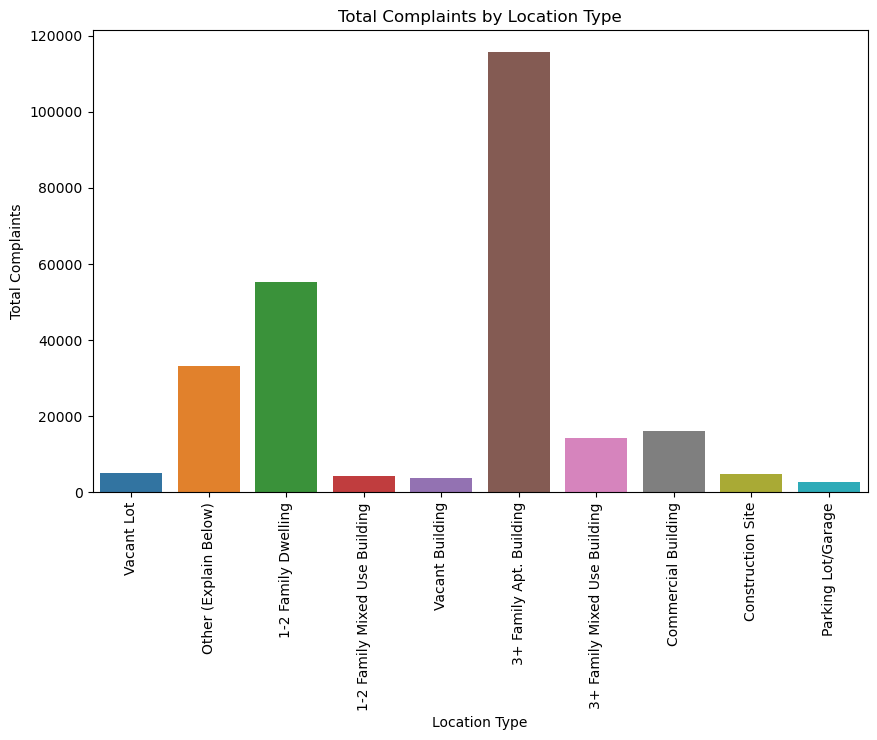

In [18]:
# Plotting bar graph showing complaints by property type
top_10_locations = df_311['Location Type'].value_counts().nlargest(10).index
df_top_10 = df_311[df_311['Location Type'].isin(top_10_locations)]

plt.figure(figsize=(10, 6))
sns.countplot(x='Location Type', data=df_top_10)
plt.title('Total Complaints by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Total Complaints')
plt.xticks(rotation=90)
plt.show()

Taking a closer look at the different location types that rodent complaints were made in, it appears that 3+ Family Apartment Buildings was the location with the most rodent complaints followed by 1-2 family dwellings. This could be because in apartment buildings, rodents have all the necessities to survive: shelter between walls and floorboards, warmth from heaters, and water/food from trash. This is a concerning find but it further proves that NYC is in need of help to eradict the rising rodent population not only outside, but also inside apartment buildings.

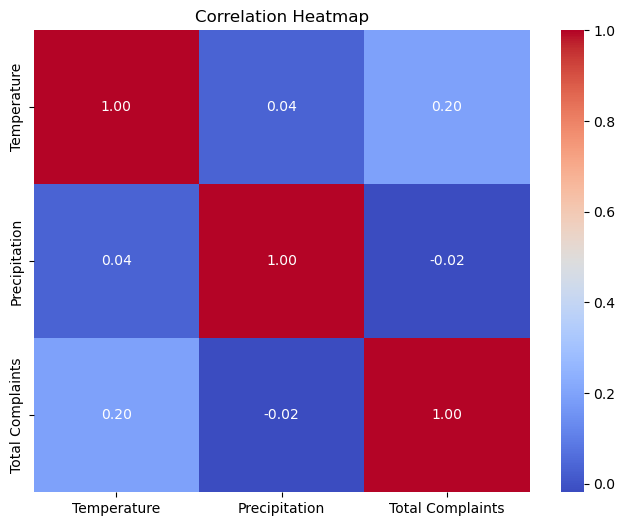

In [16]:
# Plotting heatmap showing correlation between temperature, precipitation and number of complaints
correlation_matrix = df[['Temperature', 'Precipitation', 'Total Complaints']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Prior to plotting this heatmap, my hypothesis is that 1) there would be a significant positive correlation between the temperature and total complaints and 2) a significant negative correlation between the precipitation and total complaints. The reasoning behind this is for the former 1), I thought as temperatures rose so would the amount of rodents; for the latter 2), I thought that as there is rain or snow, there would not be any rodents running around. However, it appears that only my initial guess for 1) temperature and total complaints was proven correct with a positive correlation value of 0.2. However, my guess for 2) percipitation and total complaints was off as there is only a slight negative correlation between the 2 variables.